In [ ]:
%config Completer.use_jedi = False

# Why the 3rd wave might be Bad:
- 2 main vacines being administered
    - 500 millions doses of Covishield
    - 400 million doses of Covaxin
- Both have lower efficacy against delta variant (But : Covishield > Covaxin > Any Vaccine > No vaccine)
- Rise of Delta plus subvariant
    - Has same spike protien mutation as Beta variant
    - Covishield has 30 fold reduction in efficacy against beta
    - Covaxin has better efficacy against beta variant

Even without a surge in Delta plus cases, upto 50% of the vaccinated people (Covaxin).
Rise in delta-plus cases puts the other 50% of vaccinated people (Covishield).

- With less than 30% people vaccinated with one dose (30% efficacy for covishield) - optimism is difficult


# NIFTY Analysis

In [1]:
from datetime import date

Download data using API requests

In [2]:
import requests
import json
import pandas as pd

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
new_url = '/products/dynaContent/equities/indices/historicalindices.jsp?indexType=NIFTY%2050&fromDate=01-01-2021&toDate=06-08-2021'

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36',
           'Referer': 'https://www1.nseindia.com/products/content/equities/indices/historical_index_data.htm',
           'Cookie': 'NSE-TEST-1=1927290890.20480.0000; bm_mi=E08A9F6BDEAFAC3C194E8CB0709109B5~um87wPPzrWZG9ZCvGDdS2qayHQBao1JO9ixBybWxzrqShr31H4oroIHzsp8RbmPgORV9QJpl9rLwAS1eax8oY4WsOthy7G55sGJgpMfEKyoGj9Ps3AyAd/4AR4vtHbU2kvagj03G2eXeyX2L99NZYlpwez9n8JVsv+klM1B2sdF5C3zKZXehbkB0WhV3KaHGZ/iXxx7qtTOna+nS0dbL9cBj8OedG74S2BjL51tMxdO0qkIu8oA5KOzSAYuhG+Tg0ku1ttsiM9IQkCNrDisi9t+b+yOQDdQgOhnUX4prT8hsWs05T0wfqOmabrxEuPx4YNTumQG3852Y2W/Hi6KWdXiano/ENqI4SrSzuzGrRJA5CwLBjlKiafZbRVAs1xkk; ak_bmsc=E8245BA2882758B51E8A621CACF9E6AF~000000000000000000000000000000~YAAQLa87F0XGJrJ6AQAAX59TIAwYSDe7VYSZ6TQt+ymUtwmCBr3ma5yFg5Wz5wfRwQ+yOlTxqc0NXB+aiYxSSBIcFn834koDb9ZaSIYFTef7TUeyYmDl9PU8fKb/lEQeKT3WenOSqtS6Ljtsu8fEquJwvRdR5F9gJc07Jp+OqInWLNxx2rwDeEMeO+R57K10UduyvIXC33Q6kep04dno8b4xRvdutWcSBLzZ5DcBgu/T3OMBRaX83IIkp1UknFfPUiO98E7ZXqJc5ZEYIdREoLrpnJx2h5XBj2e2qzOhPzcj6vnD1ZsXFNGCySHKmcZ6Ci1PHASgGA7DgKZF0mf5Uxp3lM5iYMGwxSIbsNvvh47ZYk8Nuqja/yYMrcunePTwy2yLF7zbgy+CW/veo+lZue5wcGMVI2FXP5XWyRZJLITv5GBZUNAOlDHgB3ziFz18GOlqb6kc3iA5LrX0v0Pa8nkO7VGd7U8k8uBxMrYPri4TqYeQ+UTD9+owC6E=; JSESSIONID=696AD765604734AF4447E5AF55D51AB4.tomcat1; RT="sl=0&ss=krz42hev&tt=0&bcn=%2F%2F364bf5fa.akstat.io%2F&z=1&dm=nseindia.com&si=b783e932-e48a-4b40-a0cd-f09ebce1a099"; bm_sv=5613F4CA27F0DC951BE449DEB28F2DAF~jFJgbv2cG+iYWaZ9aeydWIuQuA1jQCkxygGs6r2h2LSZFUgyJzWIzFbfOnyAk61b18j32i9fjr2nRBtQbM3Iu/SgQQYVdPOmZjRcqja7wfngzb4WmdN9D+4zST3I9luTjtHynMbmCQguQk0FQbcFeEh4Znyxp2TuauylhY0eJKM='}
page = requests.get(new_url,headers=headers)
dajs = json.loads(page.text)

Request headers copied from the browser

GET /products/dynaContent/equities/indices/historicalindices.jsp?indexType=NIFTY%2050&fromDate=01-01-2021&toDate=06-08-2021 HTTP/1.1
Host: www1.nseindia.com
Connection: keep-alive
sec-ch-ua: "Chromium";v="92", " Not A;Brand";v="99", "Google Chrome";v="92"
Accept: */*
X-Requested-With: XMLHttpRequest
sec-ch-ua-mobile: ?0
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36
Sec-Fetch-Site: same-origin
Sec-Fetch-Mode: cors
Sec-Fetch-Dest: empty
Referer: https://www1.nseindia.com/products/content/equities/indices/historical_index_data.htm
Accept-Encoding: gzip, deflate, br
Accept-Language: en-US,en;q=0.9
Cookie: NSE-TEST-1=1927290890.20480.0000; bm_mi=E08A9F6BDEAFAC3C194E8CB0709109B5~um87wPPzrWZG9ZCvGDdS2qayHQBao1JO9ixBybWxzrqShr31H4oroIHzsp8RbmPgORV9QJpl9rLwAS1eax8oY4WsOthy7G55sGJgpMfEKyoGj9Ps3AyAd/4AR4vtHbU2kvagj03G2eXeyX2L99NZYlpwez9n8JVsv+klM1B2sdF5C3zKZXehbkB0WhV3KaHGZ/iXxx7qtTOna+nS0dbL9cBj8OedG74S2BjL51tMxdO0qkIu8oA5KOzSAYuhG+Tg0ku1ttsiM9IQkCNrDisi9t+b+yOQDdQgOhnUX4prT8hsWs05T0wfqOmabrxEuPx4YNTumQG3852Y2W/Hi6KWdXiano/ENqI4SrSzuzGrRJA5CwLBjlKiafZbRVAs1xkk; ak_bmsc=E8245BA2882758B51E8A621CACF9E6AF~000000000000000000000000000000~YAAQLa87F0XGJrJ6AQAAX59TIAwYSDe7VYSZ6TQt+ymUtwmCBr3ma5yFg5Wz5wfRwQ+yOlTxqc0NXB+aiYxSSBIcFn834koDb9ZaSIYFTef7TUeyYmDl9PU8fKb/lEQeKT3WenOSqtS6Ljtsu8fEquJwvRdR5F9gJc07Jp+OqInWLNxx2rwDeEMeO+R57K10UduyvIXC33Q6kep04dno8b4xRvdutWcSBLzZ5DcBgu/T3OMBRaX83IIkp1UknFfPUiO98E7ZXqJc5ZEYIdREoLrpnJx2h5XBj2e2qzOhPzcj6vnD1ZsXFNGCySHKmcZ6Ci1PHASgGA7DgKZF0mf5Uxp3lM5iYMGwxSIbsNvvh47ZYk8Nuqja/yYMrcunePTwy2yLF7zbgy+CW/veo+lZue5wcGMVI2FXP5XWyRZJLITv5GBZUNAOlDHgB3ziFz18GOlqb6kc3iA5LrX0v0Pa8nkO7VGd7U8k8uBxMrYPri4TqYeQ+UTD9+owC6E=; JSESSIONID=696AD765604734AF4447E5AF55D51AB4.tomcat1; RT="sl=0&ss=krz42hev&tt=0&bcn=%2F%2F364bf5fa.akstat.io%2F&z=1&dm=nseindia.com&si=b783e932-e48a-4b40-a0cd-f09ebce1a099"; bm_sv=5613F4CA27F0DC951BE449DEB28F2DAF~jFJgbv2cG+iYWaZ9aeydWIuQuA1jQCkxygGs6r2h2LSZFUgyJzWIzFbfOnyAk61b18j32i9fjr2nRBtQbM3Iu/SgQQYVdPOmZjRcqja7wfngzb4WmdN9D+4zST3I9luTjtHynMbmCQguQk0FQbcFeEh4Znyxp2TuauylhY0eJKM=


Apparently NSE India has decided to make it harder to get the data programmatically, Until a selenium script or something is setup download the data from: 
https://www1.nseindia.com/products/content/equities/indices/historical_index_data.htm

According to https://stackoverflow.com/a/68604616/1562773
THey have added some new cookies

# NIFTY seems unstoppable

Nifty has been rising while economic indicators like GDP and GST collection have not.

In [4]:
nifty_df = pd.read_csv("../Data/Nifty/NIFTY_2021-01-01_2021-08-07.csv")

df = pd.read_csv('../Data/Nifty/NIFTY_2020-01-02_2020-31-12.csv')

df['Date'] = pd.to_datetime(df.Date)

nifty_df['Date'] = pd.to_datetime(nifty_df.Date)

nifty_df = nifty_df.set_index('Date')

df = df.set_index('Date')

nifty_df = nifty_df.append(df)

nifty_df = nifty_df.sort_index()

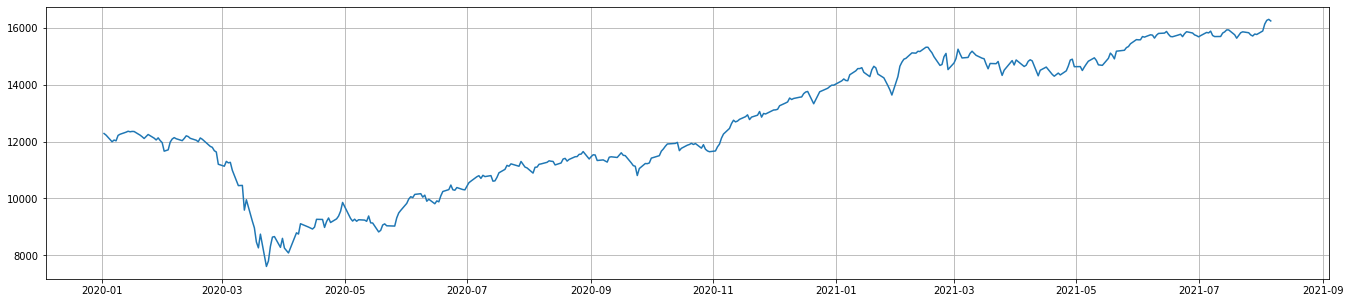

In [6]:
fig = plt.figure(figsize=(23,5))
ax = fig.add_subplot(111)
ax.plot(nifty_df.Close)
ax.grid()

The question to ask here is what is driving the price of the underlying stocks.

Let's take a look at the:

- PE Ratios - To check if their earnings have actually gone up 50% since January 2020 and/or 100% since MArch 2020
- PB Ratios - To check if their net assets have actually gone up 50% since January 2020 and/or 100% since MArch 2020

The data can be found here: https://www1.nseindia.com/products/content/equities/indices/historical_pepb.htm

In [7]:
pe_df = pd.read_csv("../Data/Nifty/NIFTY50all01-01-2021-TO-06-08-2021.csv")

df = pd.read_csv("../Data/Nifty/NIFTY50all02-01-2020-TO-31-12-2020.csv")

In [8]:
df['Date'] = pd.to_datetime(df.Date)
pe_df['Date'] = pd.to_datetime(pe_df.Date)

pe_df = pe_df.set_index('Date')

df = df.set_index('Date')

pe_df = df.append(pe_df)

In [ ]:
pe_df

## Comparing NIFTY PE and PB ratio

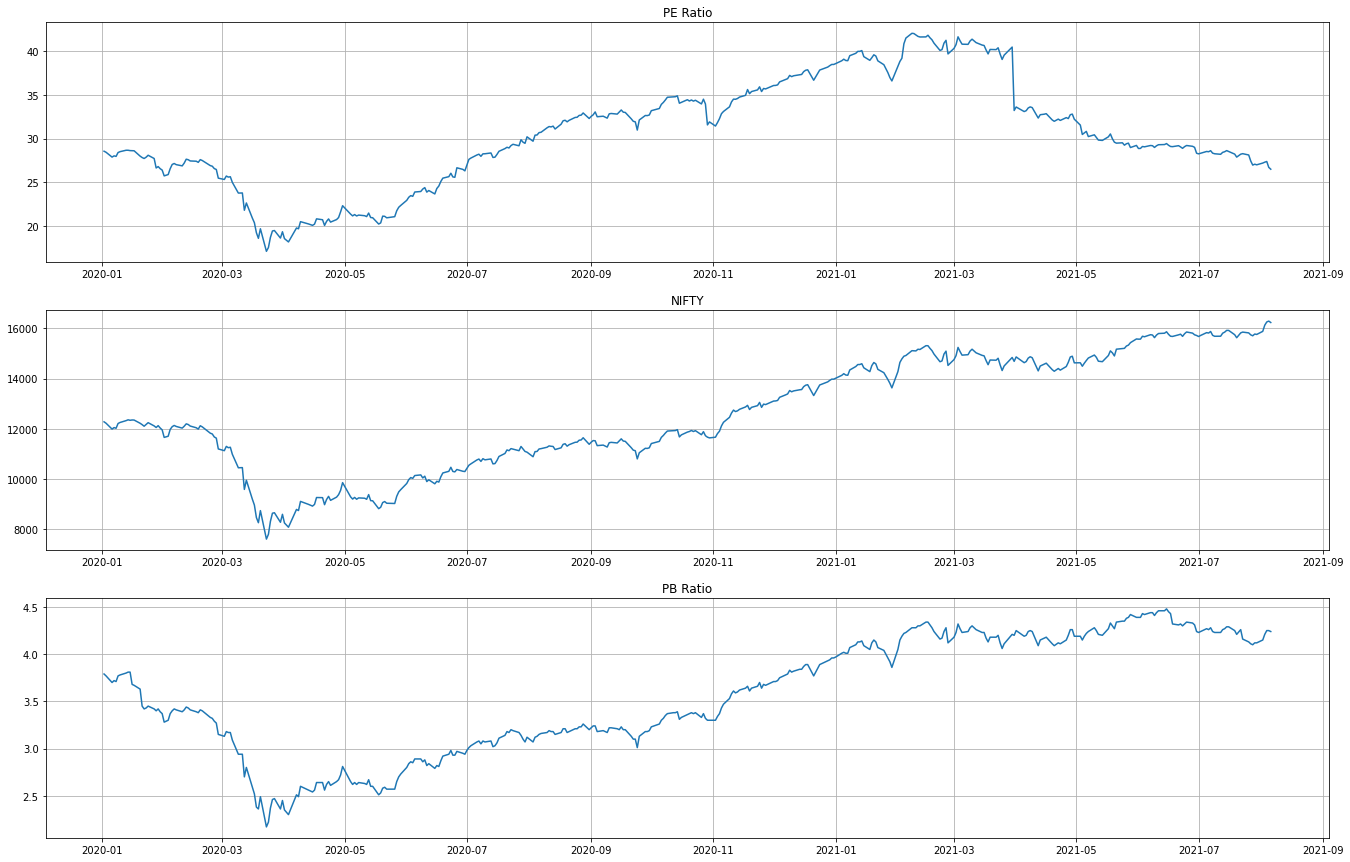

In [13]:
fig = plt.figure(figsize=(23,15))
ax = fig.add_subplot(311)
ax.plot(pe_df['P/E'])
ax.set_title('PE Ratio')
ax.grid()
ax = fig.add_subplot(312)
ax.plot(nifty_df.Close)
ax.set_title('NIFTY')
ax.grid()
ax = fig.add_subplot(313)
ax.plot(pe_df['P/B'])
ax.set_title('PB Ratio')
ax.grid()

A couple of observation:

- PE ratios had been increasing steadily in step till April 
    - It has been declining since then.
    - Sudden drops of PE ratio might indicate that we are on the verge of recovery
- PB ratios had been increasing steadily in step till May
    - It has been declining since then.

For reference:

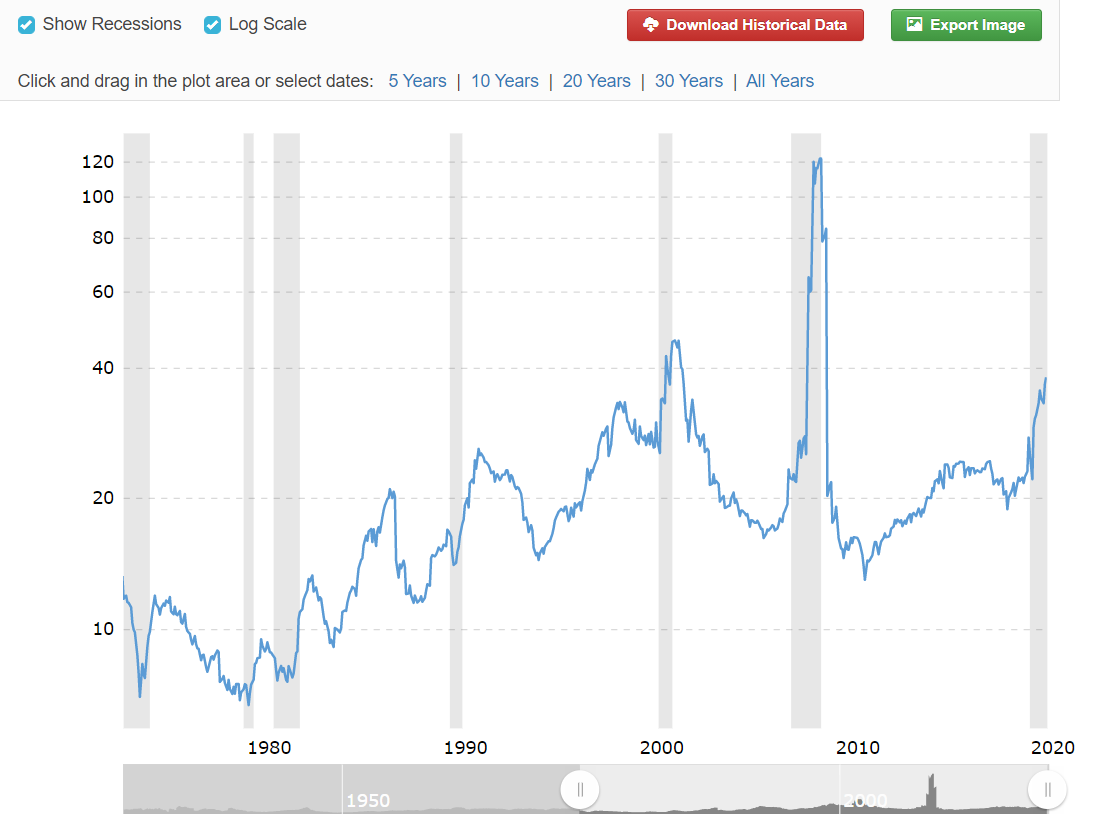

Source:https://www.macrotrends.net/2577/sp-500-pe-ratio-price-to-earnings-chart

## Combining PE ratio and PB ratio

Let's take the harmonic mean of PE and PB ratio in order to get an estimation of price to net assets and earnings

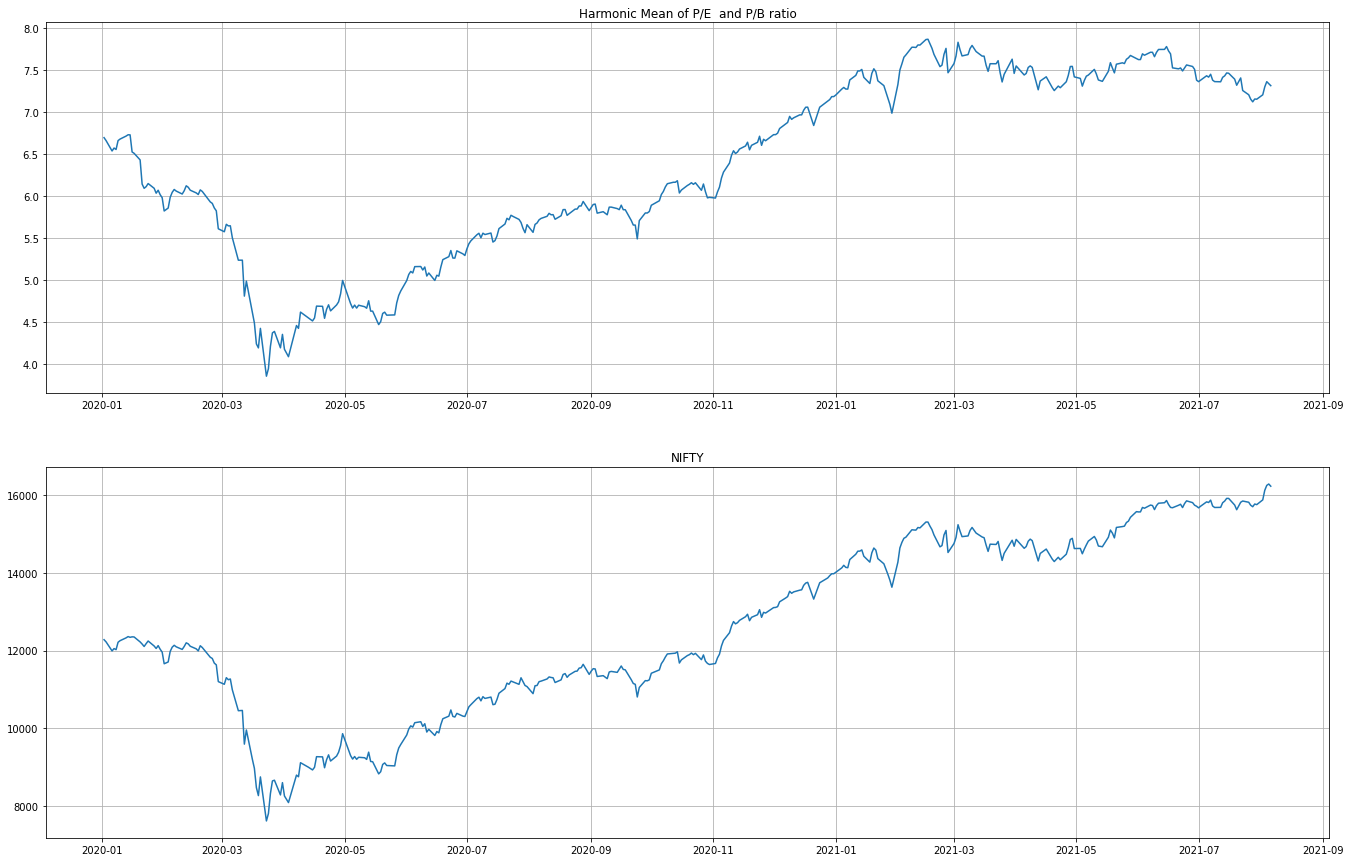

In [14]:
fig = plt.figure(figsize=(23,15))
ax = fig.add_subplot(211)
ax.plot(pe_df.apply(lambda row: 2/((1/row['P/E'])+(1/row['P/B'])), axis=1))
ax.set_title('Harmonic Mean of P/E  and P/B ratio')
ax.grid()
ax = fig.add_subplot(212)
ax.plot(nifty_df.Close)
ax.set_title('NIFTY')
ax.grid()

## Comparing with Dividend Yeild

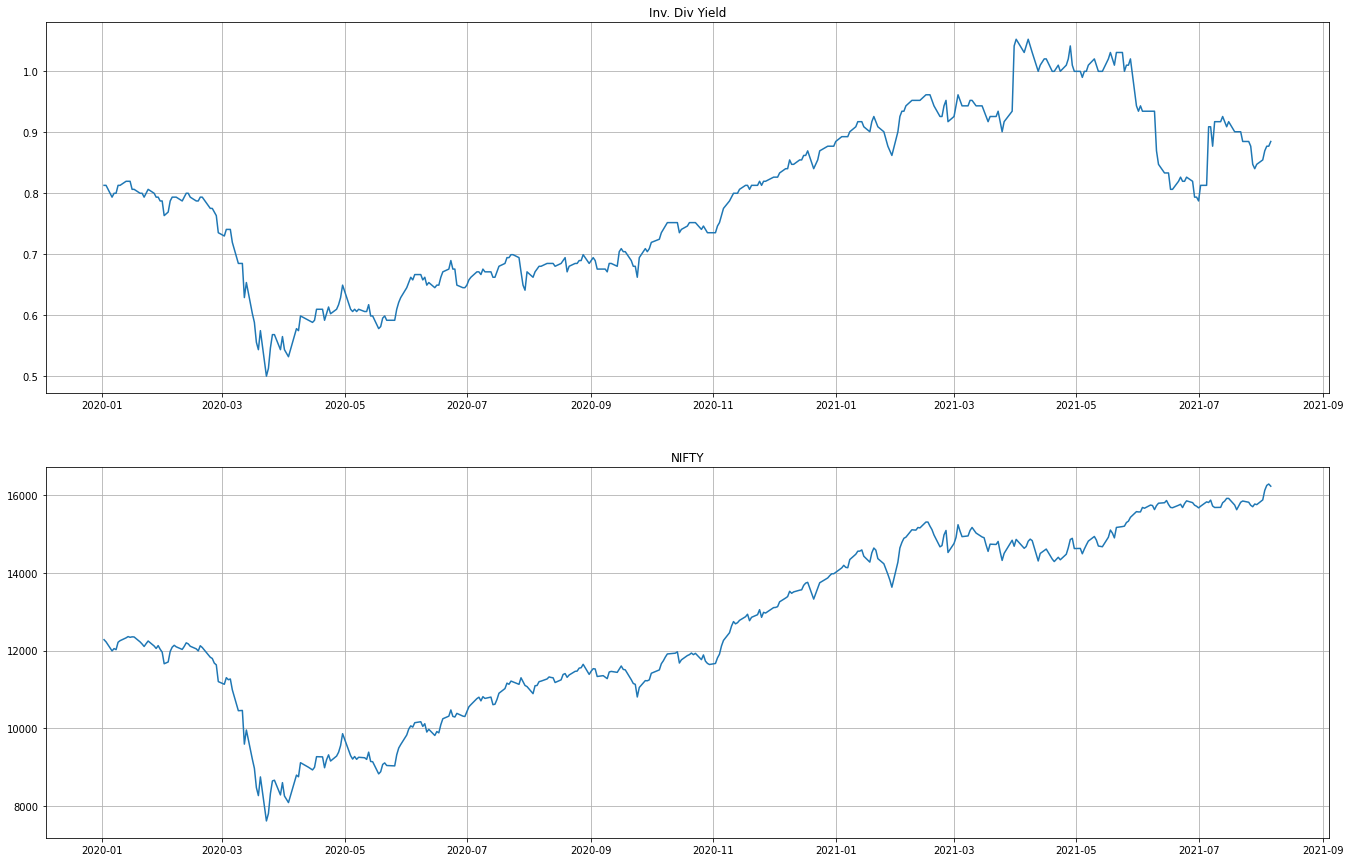

In [12]:
fig = plt.figure(figsize=(23,15))
ax = fig.add_subplot(211)
ax.plot(1/pe_df['Div Yield'])
ax.set_title('Inv. Div Yield')
ax.grid()
ax = fig.add_subplot(212)
ax.plot(nifty_df.Close)
ax.set_title('NIFTY')
ax.grid()

In [ ]:
pe_df.apply(lambda row: (1/row['P/E'])+(1/row['P/B']), axis=1)